In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#读取工作簿和工作簿中的工作表
data_frame=pd.read_excel('Problem_C_Data_Wordle.xlsx')

data = list(reversed(data_frame.loc[ 1: ,"Unnamed: 4"].tolist()))

start=0
datas=data[start:]
# for t in range(len(datas)-1):
#     datas[t]=datas[t+1]-datas[t]
# datas[-1]=data[-1]-data[-2]
length=len(datas)
days=[[i] for i in range(length)]

In [2]:
#!/usr/bin/env python
# coding: utf-8
 
# In[1]:
 
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

 
from torch import nn
from torch.autograd import Variable
 
 
# In[121]:
 
 
batch_size=32
time_step=25
epoch=1000
input_size=2
output_size=1
mid_dim=8
mid_layers=1
 
 
# In[122]:
 
class RegLSTM(nn.Module):
    def __init__(self, inp_dim, out_dim, mid_dim, mid_layers,batch):
        super(RegLSTM, self).__init__()
 
        self.rnn = nn.LSTM(inp_dim, mid_dim, mid_layers,batch_first=batch)  # rnn
        self.reg = nn.Sequential(
            nn.Linear(mid_dim, mid_dim),
            nn.Tanh(),
            nn.Linear(mid_dim, out_dim),
        )  # regression
 
    def forward(self, x):
        y = self.rnn(x)[0]  # y, (h, c) = self.rnn(x)
 
        batch_size, seq_len, hid_dim = y.shape
        y = y.reshape(-1, hid_dim)
        y = self.reg(y)
        y = y.reshape(batch_size, seq_len, -1)
        return y
 
 
# In[123]:
 
 
def load_data():
    seq_number=np.array(datas,dtype=np.float32
    )
    #print(seq_number)
    seq_number=seq_number[:,np.newaxis]
    
    #print(seq_number.shape)
    seq_year_month=np.array(days,dtype=np.float32)
    #print(seq_year_month.shape)
    seq=np.concatenate((seq_number,seq_year_month),axis=1)
    print(seq.mean(axis=0),seq.std(axis=0))
    seq=(seq-seq.mean(axis=0))/seq.std(axis=0)
    return(seq)
 
 
# In[124]:
 
 
data=load_data()
#print(data)
train_size=int(len(data)-1)
 
 
# In[125]:
 
 
data_sample=np.zeros((train_size-time_step+1,time_step,input_size))
label_sample=np.zeros((train_size-time_step+1,time_step,output_size))
for i in range(train_size-time_step+1):
    data_sample[i]=data[i:i+time_step,:]
    label_sample[i]=data[i+1:i+1+time_step,0:1:]
 
 
# In[126]:
 
 
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
net=RegLSTM(input_size,output_size,mid_dim,mid_layers,True).to(device)
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(net.parameters(),lr=1e-2)
 
 
# In[127]:
 
 
for i in range(epoch):
    for j in range(int((train_size-time_step+1)/batch_size)):
        train_X=data_sample[j*batch_size:(j+1)*batch_size,:,:]
        train_Y=label_sample[j*batch_size:(j+1)*batch_size,:,:]
        var_x=torch.tensor(train_X,dtype=torch.float32,device=device)
        var_y=torch.tensor(train_Y,dtype=torch.float32,device=device)
        out = net(var_x)
        loss=criterion(out,var_y)
        #loss = criterion(out[:,-1,:], var_y[:,-1,:])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_X=data_sample[(j+1)*batch_size:,:,:]
    train_Y=label_sample[(j+1)*batch_size:,:,:]
    var_x=torch.tensor(train_X,dtype=torch.float32,device=device)
    var_y=torch.tensor(train_Y,dtype=torch.float32,device=device)
    out = net(var_x)
    loss = criterion(out, var_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i%100==0:
        print('Epoch: {:4}, Loss: {:.5f}'.format(i, loss.item()))
 
 
# In[128]:
 
 


[90982.93   179.  ] [89094.67      103.63397]
Epoch:    0, Loss: 0.50695
Epoch:  100, Loss: 0.00321
Epoch:  200, Loss: 0.00177
Epoch:  300, Loss: 0.00267
Epoch:  400, Loss: 0.00136
Epoch:  500, Loss: 0.00188
Epoch:  600, Loss: 0.00061
Epoch:  700, Loss: 0.00105
Epoch:  800, Loss: 0.00067
Epoch:  900, Loss: 0.00115


In [3]:
def func(x, a, b, c,d):
    return a * np.exp(-(x-d)*b) + c
popt_min=np.array([ 4.34703147e+05 , 1.78907252e-02 , 2.28909992e+04 ,-1.99427168e+01])
popt_max=np.array([ 4.49901532e+05,  1.76663163e-02 , 2.43997347e+04 ,-1.48954702e+01])

(359, 2)
[20719.844]
[23037.83330171]
[20250.578]
[22868.57716581]
[20186.406]
[22834.80033831]
[19996.664]
[22759.59915555]
[19862.781]
[22703.43508337]
[19704.992]
[22639.70501051]
[19557.96]
[22579.94956357]
[19406.992]
[22519.25673506]
[19258.54]
[22459.76447044]
[19110.14]
[22400.63981821]
[18962.805]
[22342.20651819]
[18816.11]
[22284.31217353]
[18670.352]
[22227.04438171]
[18525.328]
[22170.3244702]
[18381.227]
[22114.20435758]
[18237.883]
[22058.6191444]
[18095.398]
[22003.59282937]
[17953.68]
[21949.08465113]
[17812.703]
[21895.0776179]
[17672.617]
[21841.61235004]
[17533.352]
[21788.65686052]
[17394.836]
[21736.17946081]
[17257.04]
[21684.16177128]
[17120.07]
[21632.63256531]
[16983.938]
[21581.58703041]
[16848.484]
[21530.96592554]
[16713.867]
[21480.8144262]
[16579.93]
[21431.07378242]
[16446.71]
[21381.75058113]
[16314.383]
[21332.89590471]
[16182.719]
[21284.42823984]
[16051.75]
[21236.35221991]
[15921.555]
[21188.68830521]
[15792.117]
[21141.42590089]
[15663.359]
[21094.

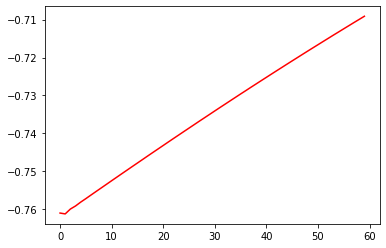

In [4]:
net=net.eval()

test_y=list()
reals=list()
new_mean=np.array([90982.93  , 179.   ])
new_std=np.array([89094.67    ,  103.63397])
print(data.shape) 
for i in range(60):
    test_X=data[-time_step:,:]
    test_x=test_X[:time_step,:].reshape(1,time_step,input_size)
    test_x=torch.tensor(test_x,dtype=torch.float32,device=device)
    pre_data=len(data)+i
    y_predict_max=[func(pre_data, popt_max[0],popt_max[1],popt_max[2],popt_max[3])]
    y_predict_min=[func(pre_data, popt_min[0],popt_min[1],popt_min[2],popt_min[3])]
    tem=net(test_x).cpu().data.numpy()
    test_y.append(tem[0][-1])
    print(test_y[-1]*new_std[0]+new_mean[0])
    for item in data:
        item[0]=item[0]*new_std[0]+new_mean[0]
        item[1]=item[1]*new_std[1]+new_mean[1]
    
    real=test_y[-1]*new_std[0]+new_mean[0]
    real=(real+y_predict_min+y_predict_max)/3
    print(real)
    
    new=np.array([[int(real),train_size+1+i]])
    data=np.concatenate((data,new),axis=0)
    
    new_mean=data.mean(axis=0)
    new_std=data.std(axis=0)
    data=(data-data.mean(axis=0))/data.std(axis=0)
    reals.append(data[-1][0])
    #print(data)
test_y=np.array(reals).reshape((-1,1))

print(test_y)



plt.plot(test_y, 'r', label='pred')

 
 

 
 
 



In [5]:
print(new_std,new_mean)

[85998.89268236   120.954536  ] [81014.78008931   209.00000068]


In [6]:
print(test_y[-1]*new_std[0]+new_mean[0])

[20030.]
